In [604]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
#Just importing everything here that I know I'll need

### EDA

In [605]:
df = pd.read_csv("Walmart_Sales_Forecasting.csv")
print(len(df))
df.head()

421570


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [607]:
store_avg = df.groupby('Store')['Weekly_Sales'].mean() #Aggregate the data
store_avg = store_avg.sort_values() #Sort the Aggregation
store_avg.head() #Preview the series

Store
5     5053.415813
33    5728.414053
44    6038.929814
3     6373.033983
38    7492.478460
Name: Weekly_Sales, dtype: float64

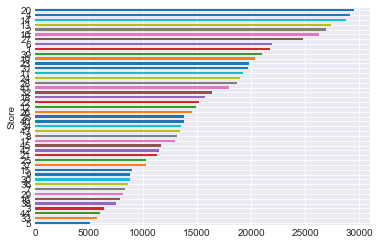

In [608]:
store_avg.plot(kind='barh')
#we see that Store 20 is the best for average sales

Text(0.5,0,'Sales')

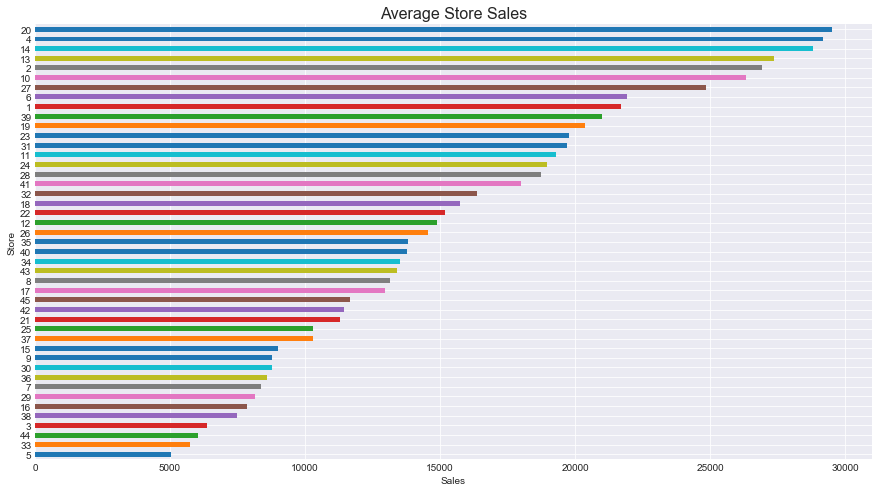

In [609]:
plt.figure(figsize=(15,8)) #Manually creates a figure object and specifies the size (will be useful for subplots later too)
store_avg.plot(kind='barh') #Same Visual code as before
plt.title('Average Store Sales', fontsize=16)
plt.xlabel('Sales') #Add Axis Label (y already labelled)

In [610]:
import seaborn as sns
sns.set_style('darkgrid')
#will make the graph easier to read

Text(0.5,0,'Sales')

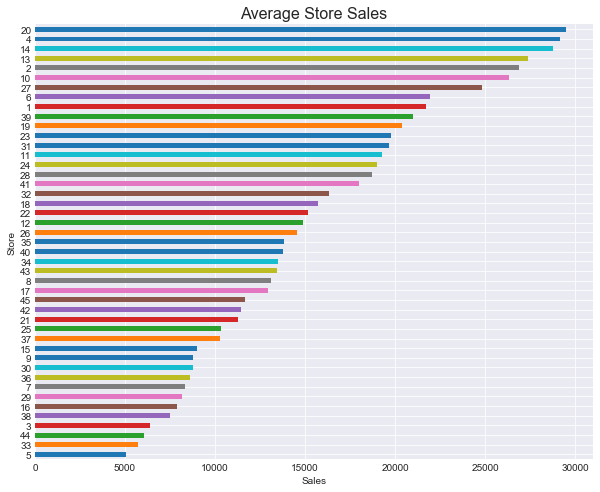

In [611]:
plt.figure(figsize=(10,8)) #Manually creates a figure object and specifies the size (will be useful for subplots later too)
store_avg.plot(kind='barh') #Same Visual code as before
plt.title('Average Store Sales', fontsize=16)
plt.xlabel('Sales') #Add Axis Label (y already labelled)

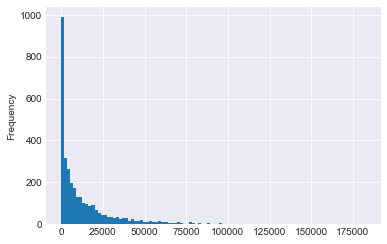

In [612]:
df.groupby(['Store', 'Dept']).Weekly_Sales.mean().plot.hist(bins=100)
#this shows that department is worthwhile to keep as dummy variable later on in analysis

In [613]:
#Create a telling plot that shows the relationship between Dept # and Sales beyond this histogram
#group by temperature levels at the three levels (mean sales) to show hypotheses that sales are best when whether isn't extreme
#group by is holiday to show that sales are better over holidays
#Bins help with grouping, looks like certain departments are significant drivers of weekly sales

Text(0.5,0,'Date')

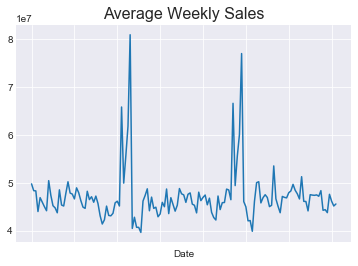

In [614]:
df.groupby('Date')['Weekly_Sales'].sum().plot(kind='line')
plt.title('Average Weekly Sales', fontsize=16)
plt.xlabel('Date') #Add Axis Label (y already labelled)

In [615]:
df1 = pd.read_csv('Walmart_features.csv')

In [616]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [617]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [618]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [619]:
df2 = pd.read_csv("walmart_store_details.csv")

In [620]:
df2.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [621]:
df3 = pd.merge(df, df1, on=['Store', 'Date', 'IsHoliday'])

In [622]:
df3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [623]:
df = pd.merge(df2, df3, on=['Store'])

In [624]:
pd.value_counts("MarkDown1")

MarkDown1    9
dtype: int64

### Feature Generation

In [625]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [626]:
# setting up termperature ranges columns
# def function assign_label
#choosing temp ranges in order to find our extreme temperatures

def assign_label(temp):
 if temp < 39: # 1 is extremely cold
    return 1
 elif temp >= 40 and temp < 90 : # 2 is ok to go shopping 
    return 2
 elif temp >= 90 and temp < 110 :  #  3 is extremely hot
    return 3
#operating under a hypothesis that sales will generally be higher when the weather isn't too extreme in either direction

In [627]:
df.loc[:,'Temp_Categories'] = df.apply(lambda x: assign_label(x['Temperature']), axis =1)

In [628]:
df["IsHoliday"].astype("int")
df["IsHoliday"]=df["IsHoliday"].astype("int")
#turning is holiday into integers

In [629]:
df.Date = df.Date.astype('datetime64')
#converting from non-null dates to datatimes

In [630]:
df['year'] = df['Date'].dt.year
df['week']=df['Date'].dt.month

In [631]:
df.drop(columns="Date", inplace=True)

In [632]:
pd.value_counts("Type")

Type    4
dtype: int64

In [633]:
df.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [634]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Temp_Categories,year,week
0,1,A,151315,1,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2
1,1,A,151315,2,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2
2,1,A,151315,3,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2
3,1,A,151315,4,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2
4,1,A,151315,5,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2


In [635]:
pd.get_dummies(df[['Store', 'Dept', 'Type']])

,Store,Dept,Type_A,Type_B,Type_C
0,1,1,1,0,0
1,1,2,1,0,0
2,1,3,1,0,0
3,1,4,1,0,0
4,1,5,1,0,0
5,1,6,1,0,0
6,1,7,1,0,0
7,1,8,1,0,0
8,1,9,1,0,0
9,1,10,1,0,0


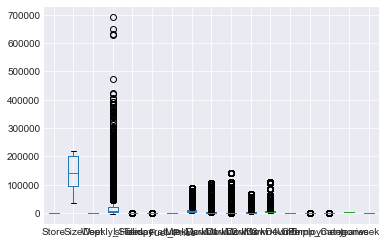

In [636]:
df.plot.box()
#wasn't sure if box plot could be illustrative here. Turns out it's not :(

In [637]:
#Solving store type
df.Type = df.Type.map({'A':1, 'B':2,'C':3})
df.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Temp_Categories,year,week
0,1,1,151315,1,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2
1,1,1,151315,2,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2
2,1,1,151315,3,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2
3,1,1,151315,4,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2
4,1,1,151315,5,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,2010,2


In [638]:
df_dum1 = pd.get_dummies(df['Store'], prefix='Store')
df_dum2 = pd.get_dummies(df['Dept'], prefix ='Dept')
df_dum3 = pd.get_dummies(df['Type'], prefix = 'Type')

df_dummies = pd.concat([df, df_dum1, df_dum2, df_dum3], axis=1)
df_dummies.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_1,Type_2,Type_3
0,1,1,151315,1,24924.50,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
1,1,1,151315,2,50605.27,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2,1,1,151315,3,13740.12,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
3,1,1,151315,4,39954.04,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
4,1,1,151315,5,32229.38,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [639]:
#concat store with department (store 1_ dept 2), and this will remove concerns about the number variables overlapping

In [640]:
df_dummies.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_1,Type_2,Type_3
0,1,1,151315,1,24924.50,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
1,1,1,151315,2,50605.27,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2,1,1,151315,3,13740.12,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
3,1,1,151315,4,39954.04,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
4,1,1,151315,5,32229.38,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [641]:
#df_dummies.drop(columns=['Type','Store','Dept','MarkDown1','MarkDown2','MarkDown3','MarkDown4','tempRange'], inplace=True)
df_dummies.dropna(inplace=True)

### Preprocessing

In [642]:
X = df_dummies.drop('Weekly_Sales', axis=1)[['Size', 'IsHoliday','Temperature', 'year', 'week']]
y = df_dummies.Weekly_Sales
#trying to clean up the dataset. This will create dummy variables for features that we don't want to represent as numeric values on repeat (e.g. Dept 2 isn't 2x of Dept 1)

In [643]:
for col in X.columns:
    X[col] = (X[col] - X[col].min())/(X[col].max() - X[col].min())
    
#this will normalize the data set between the numbers 0-1 so we should see better results later. 

In [644]:
X.head()

,Size,IsHoliday,Temperature,year,week
6587,0.630267,0.0,0.583946,0.0,0.909091
6588,0.630267,0.0,0.583946,0.0,0.909091
6589,0.630267,0.0,0.583946,0.0,0.909091
6590,0.630267,0.0,0.583946,0.0,0.909091
6591,0.630267,0.0,0.583946,0.0,0.909091


### Prediction

In [645]:
y_train.head()

Series([], Name: Weekly_Sales, dtype: float64)

In [646]:
X = df_dummies.drop('Weekly_Sales', axis=1)
y = df_dummies.Weekly_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
preds = {}
coefficients = {}
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)/len(X_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)/len(X_test)))
    print('\n')
    preds[name + '_train'] = y_hat_train
    preds[name + '_test'] = y_hat_test
    #save coefficients for feature analysis
    coefficients[name] = model.coef_

Model Stats for: OLS
Train R^2: 0.6834588394630894
Test R^2: 0.6820082934787384
Training MSE: 2675.901967024661
Testing MSE: 8197.355060939539




/Users/jacobeisenberg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Model Stats for: Lasso
Train R^2: 0.6832984698122719
Test R^2: 0.6819803017069748
Training MSE: 2677.2576626420837
Testing MSE: 8198.076647343287


Model Stats for: Ridge
Train R^2: 0.6833686435196511
Test R^2: 0.6820476945593797
Training MSE: 2676.664444492219
Testing MSE: 8196.339359456826




In [647]:
pd.DataFrame(coefficients, index=X_train.columns)

,OLS,Lasso,Ridge
Store,438.918620,-110.551142,-83.012709
Type,2595.440348,904.136380,1625.048325
Size,0.203719,0.126952,0.136699
Dept,83.677131,-2.774779,82.400026
IsHoliday,357.037699,284.736402,308.370959
Temperature,-26.047645,-29.355995,-28.739809
Fuel_Price,-2323.905007,-1821.113309,-1914.400615
MarkDown1,-0.003154,-0.006084,-0.005649
MarkDown2,-0.079341,-0.076315,-0.077263
MarkDown3,0.064018,0.065779,0.065287


In [ ]:
#Our most important line of code yet. With co-efficients, we can draw insights from the data about which features are most important.

In [648]:
preds['OLS_train']

array([31218.88622029,  9211.48086923,  5716.08378034, ...,
         772.78119045, -2927.7226281 , 36308.96764166])

In [ ]:
#group by "is holiday" to show that sales are better over holidays

In [649]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
print('Model Stats for: {}'.format('OLS'))
print('Train R^2:', model.score(X_train, y_train))
print('Test R^2:', model.score(X_test, y_test))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')

Model Stats for: OLS
Train R^2: 0.6834588394630894
Test R^2: 0.6820082934787384
Training MSE: 192531146.52742437
Testing MSE: 196605363.7815739
Model details: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)




## Analysis ##

We can draw several insights from our data above using the coefficients. For example, we see with a negative coefficient on "year' that average sales declined with every passing year in the data set. This is likely a result of the advent of online retail, leading to less in-store sales for Walmart.

We can also confirm our hypothesis that sales increase on days that are holidays. Quite significantly too. As weather is colder, sales are better. This helps validate some predictions that Black Friday and Christmas shopping play a vital role in Walmart's annual sales, as does the Super Bowl potentially. 

Other things that seem inherently obvious are also confirmed. For example, as fuel price increases, sales on fuel decrease. Interestingly, the size of the Wal-Mart doesn't impact sales much. 

In [650]:
!pwd

/Users/jacobeisenberg/Documents/DataScience
